In [2]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#importing csv file
titanic = pd.read_csv (r'E:\The_Scrapers\train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


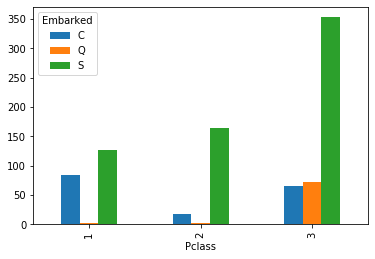

In [65]:
#grouping passengers by Pclass,Embark and then plotting for count of passengers

#pclass_by_place = titanic.groupby(['Pclass','Embarked'])['PassengerId'].count()
#print(pclass_by_place)
pclass_by_place_plot = titanic.groupby(['Pclass','Embarked'])['PassengerId'].count().unstack('Embarked')
print(pclass_by_place_plot)
pclass_by_place_plot.plot.bar()
#pclass_by_place_plot.plot.bar(stacked='true')

        count  sum  %survival
Pclass                       
1         216  136  62.962963
2         184   87  47.282609
3         491  119  24.236253


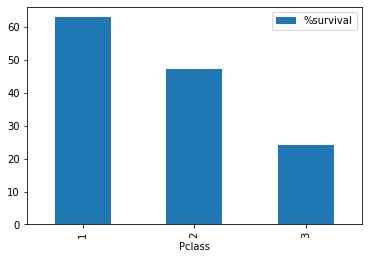

In [64]:
#Survival rate for each Pclass and then plot

sur_rate_pclass = titanic.groupby('Pclass')['Survived'].agg(['count','sum'])
sur_rate_pclass['%survival'] = sur_rate_pclass['sum']/sur_rate_pclass['count']*100
print(sur_rate_pclass)
sur_rate_pclass.plot.bar(y='%survival')

       count  sum  %survival
Parch                       
0        678  233  34.365782
1        118   65  55.084746
2         80   40  50.000000
3          5    3  60.000000
4          4    0   0.000000
5          5    1  20.000000
6          1    0   0.000000


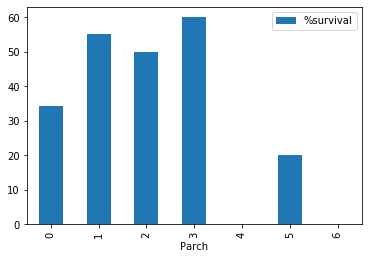

In [66]:
#Survival rate for each Parch and then plot

sur_rate_parch = titanic.groupby('Parch')['Survived'].agg(['count','sum'])
sur_rate_parch['%survival'] = sur_rate_parch['sum']/sur_rate_parch['count']*100
print(sur_rate_parch)
sur_rate_parch.plot.bar(y='%survival')

       count  sum  %survival
SibSp                       
0        608  210  34.539474
1        209  112  53.588517
2         28   13  46.428571
3         16    4  25.000000
4         18    3  16.666667
5          5    0   0.000000
8          7    0   0.000000


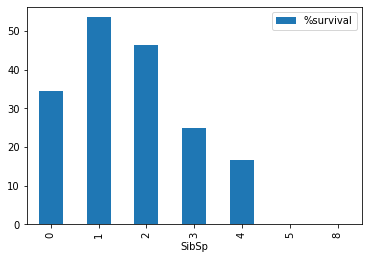

In [67]:
#Survival rate for each SibSp and then plot

sur_rate_sibsp = titanic.groupby('SibSp')['Survived'].agg(['count','sum'])
sur_rate_sibsp['%survival'] = sur_rate_sibsp['sum']/sur_rate_sibsp['count']*100
print(sur_rate_sibsp)
sur_rate_sibsp.plot.bar(y='%survival')

        Parch  SibSp
Pclass              
1          77     90
2          70     74
3         193    302


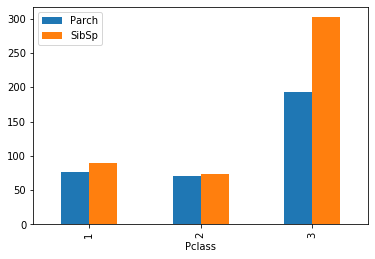

In [74]:
#Parents&Children and Siblings&Spouse totals in each Pclass

#NOTE: Family members are being considered more than once for each family member, hence not an accurate depiction

parchsibsp_by_pclass= titanic.groupby(['Pclass'])['Parch','SibSp'].sum()
print(parchsibsp_by_pclass)
parchsibsp_by_pclass.plot.bar()
#pclass_by_place_plot.plot.bar(stacked='true')
#print(pclass_by_place)

In [79]:
#create dummy variable for sex

dummy_sex = pd.get_dummies(titanic['Sex'])
titanic = pd.concat([titanic, dummy_sex], axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [80]:
#create dummy variable for embarked 

dummy_embark = pd.get_dummies(titanic['Embarked'])
titanic = pd.concat([titanic, dummy_embark], axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,1,0,0
